# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings


In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime 



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [8]:
# Try loading one file

df = pd.read_parquet(r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [9]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import os

# Local directory with CSVs
data_dir = r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records'

sampled_data = pd.DataFrame()

# Loop through each file
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_dir, filename)
        print(f"Processing file: {filename}")

        df = pd.read_csv(file_path, parse_dates=['tpep_pickup_datetime'])

        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        for date in df['date'].unique():
            df_date = df[df['date'] == date]

            for hour in range(24):
                hour_data = df_date[df_date['hour'] == hour]

                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

# Save locally
sampled_data.to_csv('sampled_nyc_taxi_data.csv', index=False)
print("Sampling complete. File saved as 'sampled_nyc_taxi_data.csv'")


Sampling complete. File saved as 'sampled_nyc_taxi_data.csv'


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [14]:
# Store the df in csv/parquet
# df.to_parquet('C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
import pandas as pd

# Load the new data file (Parquet format)
df = pd.read_parquet(r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Display the first few rows of the dataset




In [4]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37928560 entries, 0 to 2846721
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            flo

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [3]:
import pandas as pd

# Load your DataFrame
df = pd.read_parquet(r"C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")

# Drop any unnamed index columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed', case=False)]

# Reset the index properly
df.reset_index(drop=True, inplace=True)

# View the cleaned DataFrame
print(df.head())



   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [5]:
import pandas as pd

# Load the DataFrame
df = pd.read_parquet(r"C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")

# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed', case=False)]
df.reset_index(drop=True, inplace=True)

# Identify columns related to airport fee
airport_fee_cols = [col for col in df.columns if 'airport_fee' in col.lower()]

# If there are exactly 2 columns, combine them
if len(airport_fee_cols) == 2:
    df['airport_fee_combined'] = df[airport_fee_cols].sum(axis=1, skipna=True)
    df.drop(columns=airport_fee_cols, inplace=True)
    df.rename(columns={'airport_fee_combined': 'airport_fee'}, inplace=True)

# Print the first few rows
print(df.head())




   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [6]:
# Find rows with negative fare_amount
negative_fares = df[df['fare_amount'] < 0]

# Show the result
print(negative_fares)



Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [7]:
# Filter rows with negative fare_amount
negative_fares = df[df['fare_amount'] < 0]

# Check the distribution of RatecodeID in those rows
ratecode_counts = negative_fares['RatecodeID'].value_counts(dropna=False)

# Display the result
print(ratecode_counts)



Series([], Name: count, dtype: int64)


In [8]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Identify columns with any negative values
negative_value_cols = (numeric_cols < 0).any()

# Filter and display only the columns with True (i.e., negatives present)
negative_columns = negative_value_cols[negative_value_cols].index.tolist()

print("Columns with negative values:", negative_columns)



Columns with negative values: ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [24]:
import numpy as np

# Get numeric columns
numeric_cols = df.select_dtypes(include='number')

# Identify columns with negative values
negative_cols = (numeric_cols < 0).any()
columns_with_negatives = negative_cols[negative_cols].index.tolist()

# OPTION 1: Set negatives to NaN
# For a DataFrame, use apply with axis=1 to apply the function row-wise (or column-wise if needed)
df[columns_with_negatives] = df[columns_with_negatives].apply(lambda row: row.map(lambda x: np.nan if x < 0 else x), axis=0)


# OPTION 2: Set negatives to 0
# df[columns_with_negatives] = df[columns_with_negatives].applymap(lambda x: 0 if x < 0 else x)

# OPTION 3: Take absolute values
# df[columns_with_negatives] = df[columns_with_negatives].abs()




### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [10]:
# Calculate proportion of missing values per column
missing_proportions = df.isnull().mean()

# Display as percentages
missing_percent = missing_proportions * 100

# Print results sorted from highest to lowest
print(missing_percent.sort_values(ascending=False))



airport_fee              92.169518
congestion_surcharge      3.437618
passenger_count           3.434251
RatecodeID                3.434251
store_and_fwd_flag        3.434251
total_amount              0.004783
improvement_surcharge     0.004783
mta_tax                   0.004429
extra                     0.000158
tolls_amount              0.000005
tip_amount                0.000000
VendorID                  0.000000
fare_amount               0.000000
tpep_pickup_datetime      0.000000
DOLocationID              0.000000
PULocationID              0.000000
trip_distance             0.000000
tpep_dropoff_datetime     0.000000
payment_type              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [16]:
# Check if there are any missing values
print(df['passenger_count'].isnull().sum())


0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [17]:
# Replace zero values in 'passenger_count' with the mode (most frequent value)
df['passenger_count'] = df['passenger_count'].replace(0, mode_value)

# Alternatively, if you want to set it to NaN instead of replacing it with the mode:
# df['passenger_count'] = df['passenger_count'].replace(0, np.nan)

# Check to confirm changes
print(df['passenger_count'].value_counts())


passenger_count
1.0    29425268
2.0     5548754
3.0     1378894
4.0      777279
5.0      481658
6.0      316303
8.0         256
7.0          93
9.0          55
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge




Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [25]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Find columns with missing values
missing_columns = missing_values[missing_values > 0]

# Handle missing values
for column in missing_columns.index:
    if df[column].dtype == 'object':  # If the column is categorical
        mode_value = df[column].mode()[0]  # Get the mode (most frequent value)
        df[column] = df[column].fillna(mode_value)  # For mode imputation
    else:  # If the column is numerical
        median_value = df[column].median()  # Get the median value
        df[column] = df[column].fillna(median_value)  # For median imputation

# Verify that all missing values are handled
print(df.isnull().sum())  # Should print 0 for all columns



VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data to get an overview of numerical columns
summary_stats = df.describe()

# Calculate the IQR for each numerical column to identify potential outliers
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1


# Outlier detection: values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Show potential outliers for each column
outlier_columns = outliers.any()
outlier_columns = outlier_columns[outlier_columns == True].index.tolist()

# Display summary statistics and outlier columns
print("Summary Statistics:\n", summary_stats)
print("\nColumns with potential outliers:", outlier_columns)



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [2]:
import pandas as pd

# Load your dataset (adjust the path as needed)
df = pd.read_parquet(r"C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")

# Now you can remove passenger_count > 6
df = df[df['passenger_count'] <= 6]


In [4]:
import pandas as pd
import numpy as np

# 1. Remove trips with more than 6 passengers
df = df[df['passenger_count'] <= 6]

# 2. Remove entries where trip_distance ≈ 0 but fare_amount > 300
df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]

# 3. Remove entries where both trip_distance and fare_amount are 0 but zones are different
df = df[~((df['trip_distance'] == 0) & 
          (df['fare_amount'] == 0) & 
          (df['PULocationID'] != df['DOLocationID']))]

# 4. Remove entries with trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]

# 5. Remove entries where payment_type is 0 (invalid)
df = df[df['payment_type'] != 0]

# 6. Replace negative monetary values (e.g., fare, tax) with NaN
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
df[monetary_columns] = df[monetary_columns].apply(lambda col: pd.to_numeric(col, errors='coerce'))
# Replace negative values with NaN in monetary columns
df[monetary_columns] = df[monetary_columns].apply(lambda col: col.map(lambda x: np.nan if x < 0 else x))


# 7. Optionally fill negative value NaNs with median (or other logic)
for col in monetary_columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# 8. Final check for remaining outliers or NaNs (optional)
print("Remaining nulls:\n", df.isnull().sum())


Remaining nulls:
 VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count                 0
trip_distance                   0
RatecodeID                      0
store_and_fwd_flag              0
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge            0
airport_fee              33653151
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to standardize
cols_to_standardize = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'
]

scaler = StandardScaler()
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

# Check summary stats
print(df[cols_to_standardize].describe())


       trip_distance   fare_amount         extra       mta_tax    tip_amount  \
count   3.662297e+07  3.662297e+07  3.662297e+07  3.662297e+07  3.662297e+07   
mean    1.087420e-15 -1.970551e-16 -2.637026e-15 -1.215221e-13 -4.612828e-16   
std     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    -7.570104e-01 -2.570501e-01 -8.889743e-01 -9.840200e+00 -8.607275e-01   
25%    -5.272341e-01 -1.364543e-01 -8.889743e-01  9.345553e-02 -6.205784e-01   
50%    -3.652966e-01 -8.199159e-02 -3.440338e-01  9.345553e-02 -1.739011e-01   
75%    -1.516135e-02  2.693373e-02  4.733770e-01  9.345553e-02  2.079359e-01   
max     5.387065e+01  5.017876e+03  5.163239e+01  1.046306e+03  1.001522e+03   

       tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  
count  3.662297e+07           3.662297e+07  3.662297e+07          3.662297e+07  
mean   3.479274e-16          -5.725981e-14 -2.230586e-16         -2.474304e-16  
std    1.000000e+00           1.0000

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

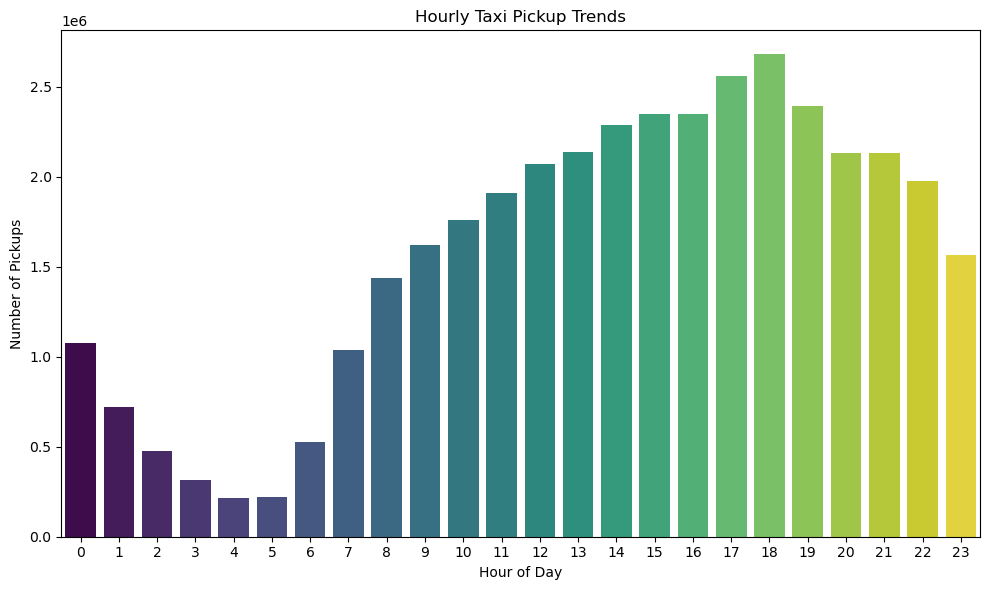

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your dataset
df = pd.read_parquet(r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')  # 🔁 Replace with your actual file name if different

# Step 2: Convert pickup datetime to proper datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Step 3: Extract hour from pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Step 4: Plot hourly pickup trends
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df, hue='pickup_hour', palette='viridis', legend=False)
plt.title('Hourly Taxi Pickup Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your dataset
df = pd.read_parquet(r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')  # 🔁 Replace with your actual file name if different

# Step 2: Convert pickup datetime to proper datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Step 3: Extract hour from pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Step 4: Plot hourly pickup trends
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df, hue='pickup_hour', palette='viridis', legend=False)
plt.title('Hourly Taxi Pickup Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()


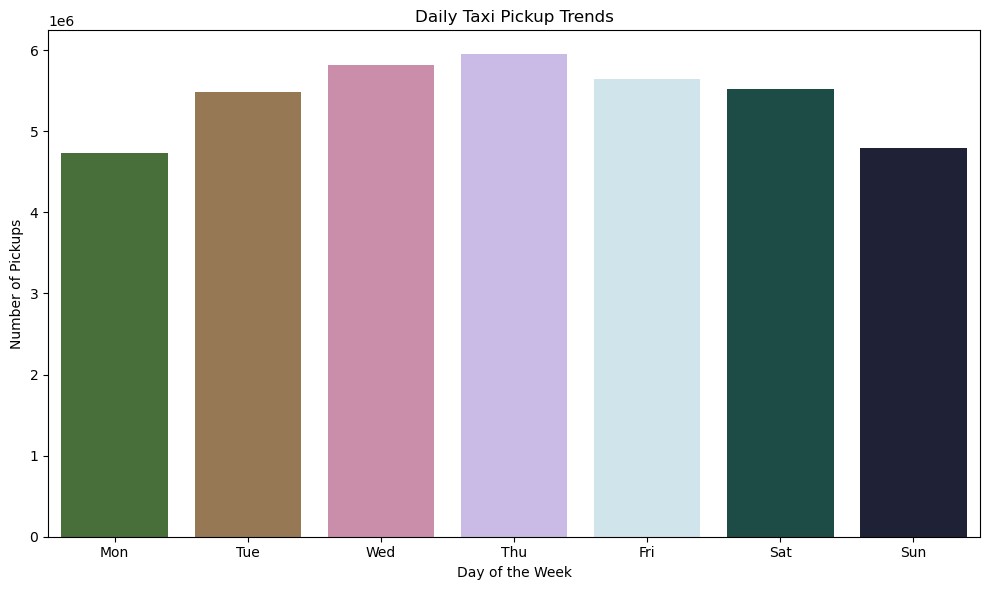

In [6]:
# Step 5: Extract day of the week (e.g., Mon, Tue, etc.)
df['pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name().str[:3]  # e.g., 'Mon', 'Tue', etc.

# Step 6: Define the order of days for better plotting
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Step 7: Plot daily pickup trends
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_day_name', data=df, order=days_order, hue='pickup_day_name', palette='cubehelix', legend=False)
plt.title('Daily Taxi Pickup Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()




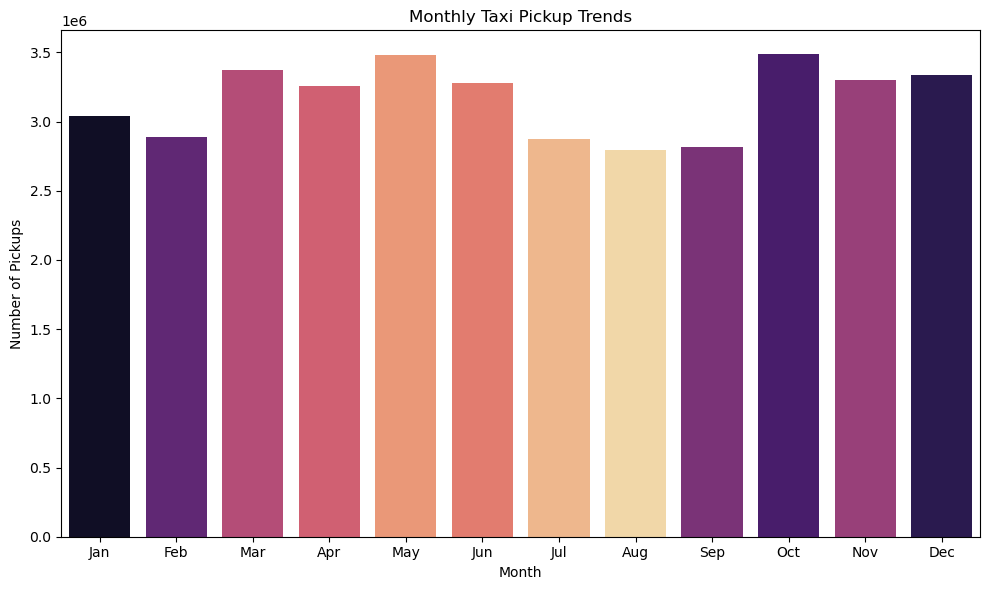

In [7]:
# Step 8: Extract month name from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name().str[:3]  # e.g., 'Jan', 'Feb', etc.

# Optional: Define the correct month order for plotting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Step 9: Plot monthly pickup trends
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_month', data=df, order=month_order, hue='pickup_month', palette='magma', legend=False)
plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()




##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [8]:
# Step 1: Check for zero or negative values in financial columns
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Step 2: Check if any of these columns have zero or negative values
for column in financial_columns:
    negative_or_zero = df[df[column] <= 0]  # Check for negative or zero values
    print(f"Number of rows with zero or negative values in {column}: {negative_or_zero.shape[0]}")
    print(f"Example rows with zero or negative {column}:")
    print(negative_or_zero.head(), "\n")


Number of rows with zero or negative values in fare_amount: 12852
Example rows with zero or negative fare_amount:
       VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3291          1  2023-01-01 00:11:55   2023-01-01 00:11:55              1.0   
6108          1  2023-01-01 01:19:19   2023-01-01 01:19:37              1.0   
6109          1  2023-01-01 01:20:41   2023-01-01 01:21:20              0.0   
6110          1  2023-01-01 01:23:02   2023-01-01 01:23:13              5.0   
14769         2  2023-01-01 02:05:03   2023-01-01 02:18:58              2.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3291            0.00         5.0                  Y           137   
6108            1.20         5.0                  N           236   
6109            1.20         5.0                  N           236   
6110            1.20         5.0                  N           239   
14769           4.73         5.0                  N           148 

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [9]:
# Step 1: Create a copy of the DataFrame to work with
df_filtered = df.copy()

# Step 2: Filter out zero or negative values for financial columns
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Filtering out negative or zero values for fare_amount, tip_amount, and total_amount
df_filtered = df_filtered[(df_filtered['fare_amount'] > 0) & 
                           (df_filtered['tip_amount'] > 0) & 
                           (df_filtered['total_amount'] > 0)]

# Step 3: Handle trip_distance
# For trip_distance, keep entries where the distance is zero only if the pickup and dropoff zones are the same
df_filtered = df_filtered[~((df_filtered['trip_distance'] == 0) & 
                             (df_filtered['PULocationID'] != df_filtered['DOLocationID']))]

# Step 4: Verify by checking the first few rows and any zero/negative values left
print(f"Rows after filtering: {df_filtered.shape[0]}")
print(df_filtered.head())



Rows after filtering: 29159653
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
5         2  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0   
6         2  2023-01-01 00:09:22   2023-01-01 00:19:49              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
4           1.43         1.0                  N           107            79   
5           1.84         1.0                  N           161           137   
6           1.66         1.0                  N           239           143   

   payment_type  ...  mta_tax  tip_amount  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

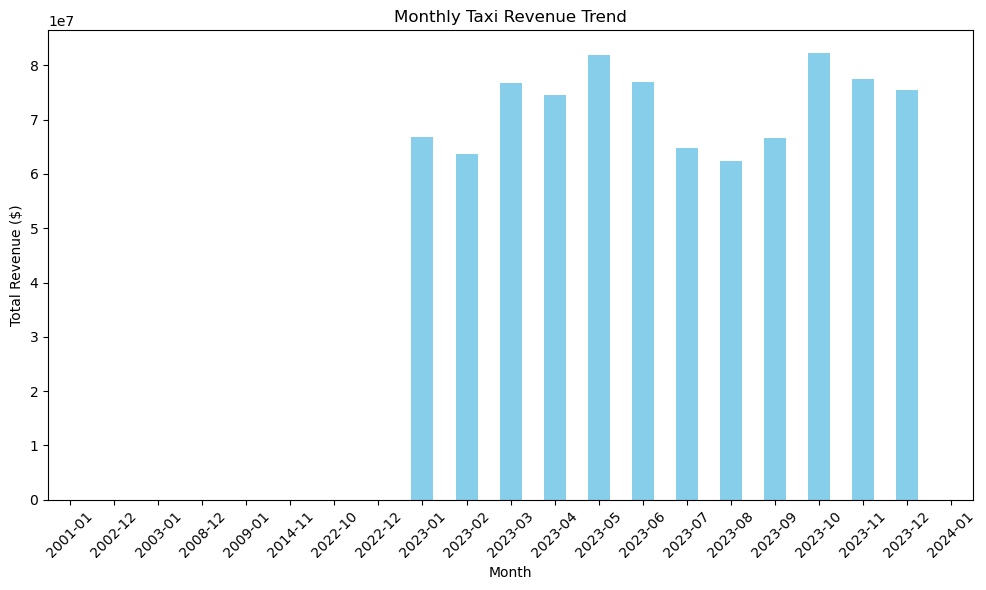

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_filtered is the DataFrame after filtering zero values
# If not already done, ensure 'tpep_pickup_datetime' is in datetime format
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])

# Step 1: Extract the month and year from the pickup datetime
df_filtered['pickup_month'] = df_filtered['tpep_pickup_datetime'].dt.to_period('M')  # 'M' for monthly period

# Step 2: Group by month and calculate the total revenue (total_amount)
monthly_revenue = df_filtered.groupby('pickup_month')['total_amount'].sum()

# Step 3: Plot the monthly revenue trend
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')  # You can also use kind='line' for a line plot
plt.title('Monthly Taxi Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

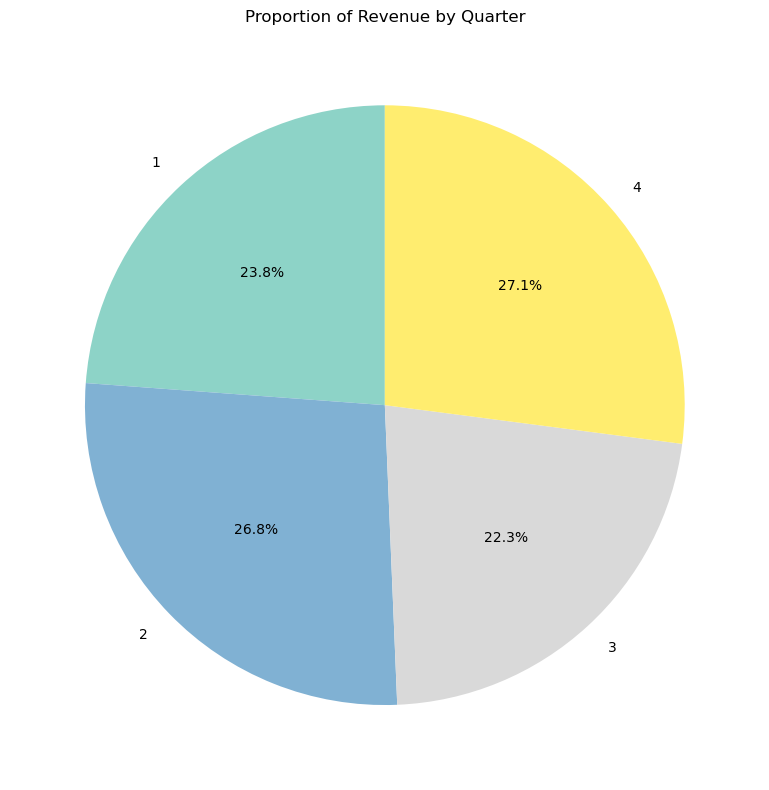

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is the DataFrame after filtering zero values
# If not already done, ensure 'tpep_pickup_datetime' is in datetime format
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])

# Step 1: Extract the quarter from the pickup datetime
df_filtered['quarter'] = df_filtered['tpep_pickup_datetime'].dt.quarter

# Step 2: Group by quarter and calculate the total revenue (total_amount)
quarterly_revenue = df_filtered.groupby('quarter')['total_amount'].sum()

# Step 3: Calculate the proportion of each quarter's revenue relative to the total revenue
total_revenue = quarterly_revenue.sum()
quarterly_proportion = (quarterly_revenue / total_revenue) * 100  # Get percentage

# Step 4: Visualize the proportion of each quarter using a pie chart
plt.figure(figsize=(8, 8))
quarterly_proportion.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Proportion of Revenue by Quarter')
plt.ylabel('')  # Hide the ylabel to make the chart cleaner
plt.tight_layout()
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

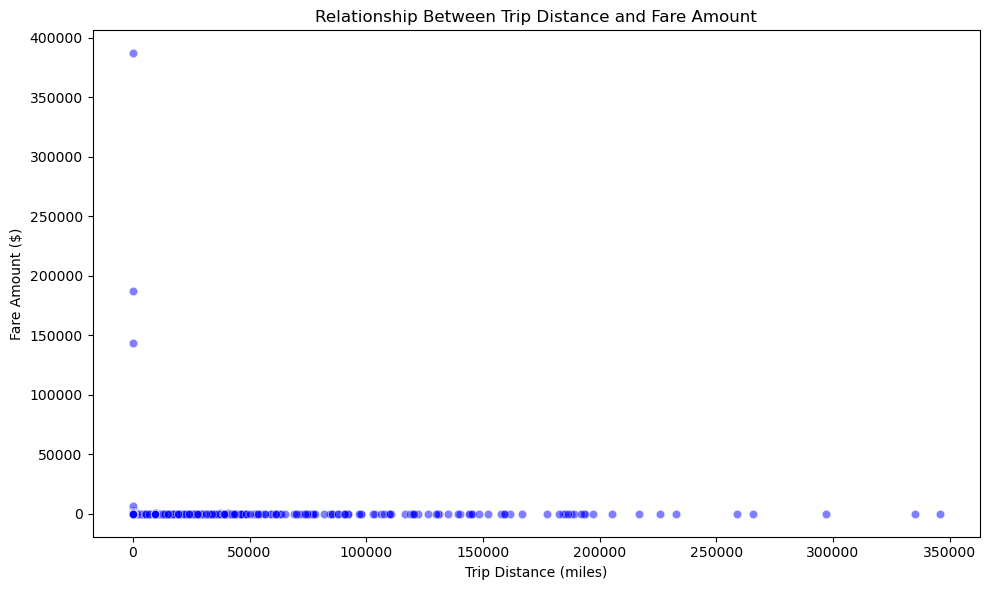

Correlation between trip distance and fare amount: 0.004546950666866552


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out trips with trip_distance = 0
df_filtered = df[df['trip_distance'] > 0]

# Step 2: Plot the relationship between trip_distance and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered, alpha=0.5, color='blue')
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.tight_layout()
plt.show()

# Step 3: Calculate the correlation coefficient
correlation = df_filtered[['trip_distance', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between trip distance and fare amount: {correlation}")




**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

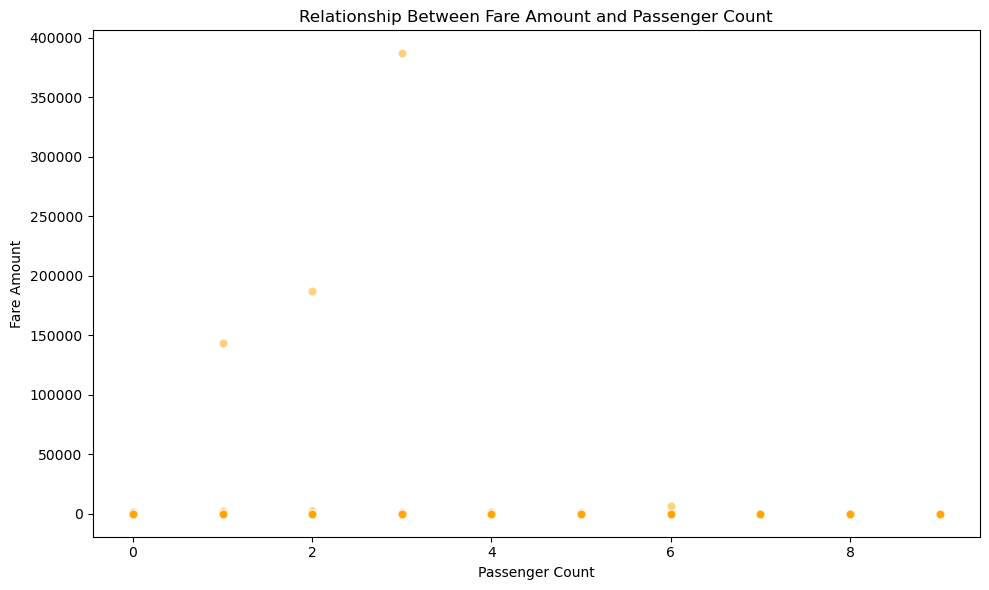

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index of the filtered DataFrame to avoid duplicate indices
df_filtered.reset_index(drop=True, inplace=True)

# Step 4: Visualize the relationship between fare_amount and passenger_count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df_filtered, alpha=0.5, color='orange')
plt.title('Relationship Between Fare Amount and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out any rows with invalid or zero passenger count if necessary (optional)
df_filtered = df[df['passenger_count'] > 0]

# Step 2: Create the scatter plot to visualize the relationship between fare_amount and passenger_count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df_filtered, alpha=0.5, color='purple')
plt.title('Relationship Between Fare Amount and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.tight_layout()
plt.show()




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out rows where trip_distance is zero or negative
df_filtered = df[df['trip_distance'] > 0]

# Step 2: Create the scatter plot to visualize the relationship between tip_amount and trip_distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_filtered, alpha=0.5, color='blue')
plt.title('Relationship Between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.tight_layout()
plt.show()




**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Count the occurrences of each payment type
payment_counts = df['payment_type'].value_counts()

# Step 2: Create a bar plot to show the distribution of payment types
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed for readability
plt.tight_layout()
plt.show()





- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [14]:
pip install geopandas


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --- ------------------------------------ 1.6/16.2 MB 8.4 MB/s eta 0:00:02
   --------- ------------------------------ 3.9/16.2 MB 9.8 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.2 MB 7.7 MB/s eta 0:00:02
   ------------------- -------------------- 7.9/16.2 MB 9.7 MB/s eta 0:00:01
   ---------------------- ----------------- 8.9/16.2 MB 9.7 MB/s eta 0:00:01
   ----------------------------- ---------- 11.8/16.2 MB 9.6 MB/s eta 0:00:01
   ---------------------------------- ----- 13.9/16.2 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------- -------------------------- 2.1/6.3 MB 9.0 MB/s eta 0:00:01
   -------------------------- ------------- 4.2/6.3 MB 9.7 MB/s eta 0:00:01
   --------

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [16]:
import geopandas as gpd

# Replace this with the correct path to your shapefile
zones = gpd.read_file(r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones')

# Display the first few rows of the GeoDataFrame
print(zones.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


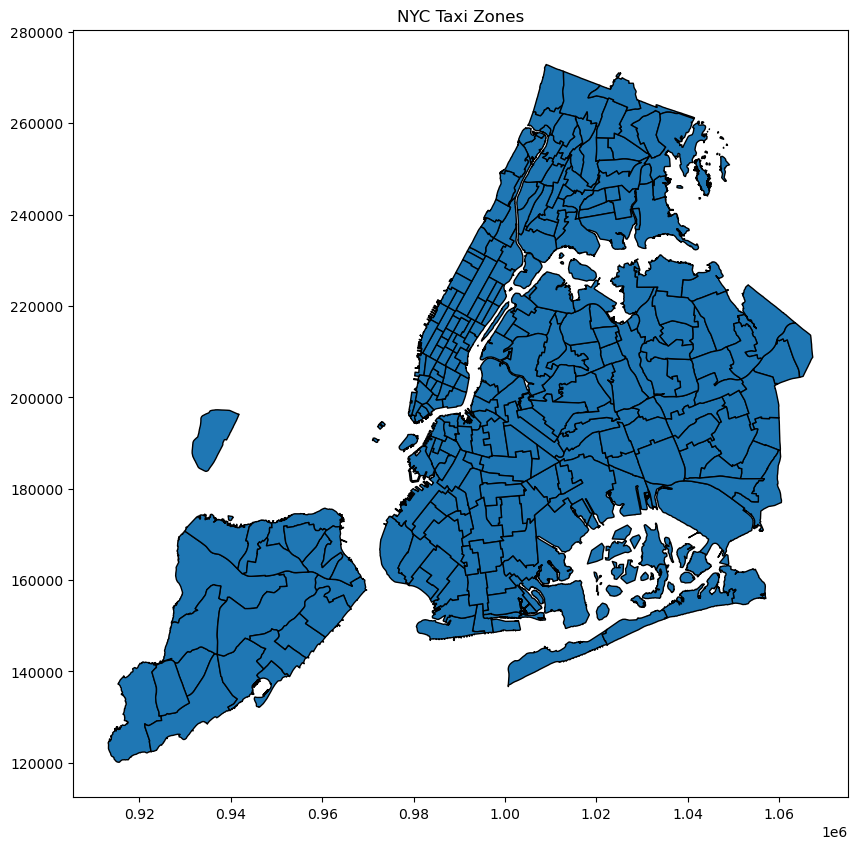

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
zones = gpd.read_file(r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')

# Display basic information about the GeoDataFrame
print(zones.info())

# Plot the taxi zones
zones.plot(figsize=(10, 10), edgecolor='black')  # You can adjust the figsize for better visualization
plt.title("NYC Taxi Zones")
plt.show()


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [34]:
import pandas as pd
import geopandas as gpd
import zipfile
import os

# Step 1: Extract trip records zip
zip_file_path = r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC (1).zip'
extracted_folder = r'C:\Users\Akhil Ranjan\Downloads\Datasets_and_Extracted'

if not os.path.exists(extracted_folder):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder)

# Step 2: Path to the trip records parquet file
trip_data_path = os.path.join(extracted_folder, 'Datasets and Dictionary', 'trip_records.parquet')

if not os.path.exists(trip_data_path):
    raise FileNotFoundError(f"Trip data file not found at: {trip_data_path}")

# Load trip records
trip_data = pd.read_parquet(trip_data_path)

# Step 3: Load taxi zones shapefile
zones_shapefile_path = r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp'
zones = gpd.read_file(zones_shapefile_path)

# Step 4: Ensure matching data types for merge
trip_data['PULocationID'] = trip_data['PULocationID'].astype(int)
zones['LocationID'] = zones['LocationID'].astype(int)

# Step 5: Merge on location IDs
merged_data = pd.merge(trip_data, zones, left_on='PULocationID', right_on='LocationID', how='left')

# Check merge success
print(merged_data.info())

# Step 6: Save output
output_parquet_path = r'C:\Users\Akhil Ranjan\Downloads\merged_trip_zones.parquet'
merged_data.to_parquet(output_parquet_path, index=False)

print(f"✅ Data successfully merged and saved to:\n{output_parquet_path}")


FileNotFoundError: Trip data file not found at: C:\Users\Akhil Ranjan\Downloads\Datasets_and_Extracted\Datasets and Dictionary\trip_records.parquet

In [36]:
import pandas as pd
import geopandas as gpd
from shapely import wkt  # Only needed if using WKT conversion

# Load the zones shapefile
zones = gpd.read_file(
    r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp'
)

zones['LocationID'] = zones['LocationID'].astype(int)

trip_data_path = r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records.csv'

chunk_size = 1_000_000
chunks = pd.read_csv(trip_data_path, chunksize=chunk_size)

merged_chunks = []

for chunk in chunks:
    chunk['PULocationID'] = chunk['PULocationID'].astype(int)
    chunk_merged = pd.merge(chunk, zones, left_on='PULocationID', right_on='LocationID', how='left')
    merged_chunks.append(chunk_merged)

merged_data = pd.concat(merged_chunks, ignore_index=True)

trips_per_location = merged_data.groupby('LocationID').size().reset_index(name='num_trips')

zones_with_trips = zones.merge(trips_per_location, on='LocationID', how='left')

# Convert geometry to WKT for compatibility with Parquet
zones_with_trips['geometry'] = zones_with_trips['geometry'].apply(lambda geom: geom.wkt)

output_parquet_path = r'C:\Users\Akhil Ranjan\Downloads\zones_with_trips.parquet'
zones_with_trips.to_parquet(output_parquet_path, engine='pyarrow', index=False)

print(f"✅ Data saved successfully to: {output_parquet_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Akhil Ranjan\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records.csv'

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group by LocationID and count the number of trips (using size)
trips_per_location = merged_data.groupby('LocationID').size().reset_index(name='num_trips')

# Display the first few rows of the result
print(trips_per_location.head())




**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the zones data (taxi zones shapefile)
zones_path = r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones.shp'  # Ensure the path is correct
zones = gpd.read_file(zones_path)

# Update the path with the actual file path of your trip records CSV
trip_data_path = r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records.csv'  # Correct file path to the CSV

# Load the trips data
trip_data = pd.read_csv(trip_data_path)

# Merge the trip records with the zones data using PULocationID from trip records and LocationID from zones
merged_data = pd.merge(trip_data, zones, left_on='PULocationID', right_on='LocationID', how='left')

# Group by LocationID to count the number of trips per zone
trips_per_location = merged_data.groupby('LocationID').size().reset_index(name='num_trips')

# Merge the trips count data back to the zones GeoDataFrame using the LocationID
zones_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='LocationID', how='left')

# Plot the map showing the total number of trips per zone
plt.figure(figsize=(10, 8))
zones_with_trips.plot(column='num_trips', cmap='viridis', legend=True,
                      legend_kwds={'label': "Number of Trips per Zone", 'orientation': "horizontal"})
plt.title('Total Number of Trips per Taxi Zone')
plt.show()



DataSourceError: C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones.shp: No such file or directory

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

NameError: name 'zones_with_trips' is not defined

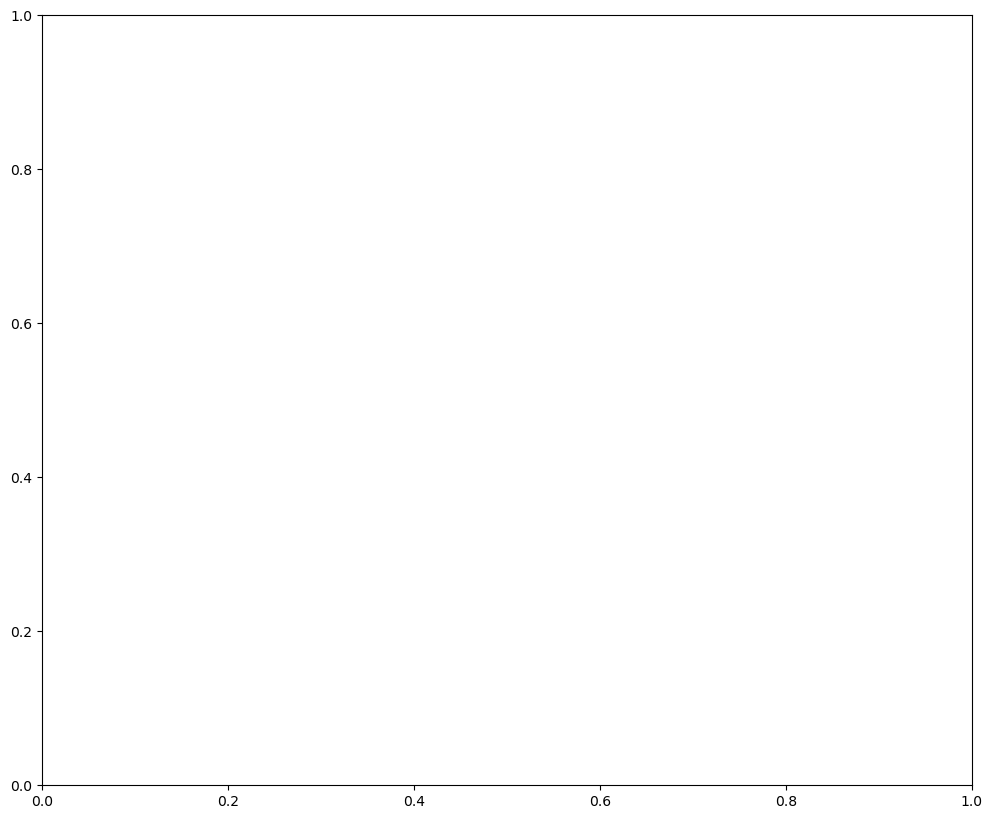

In [41]:
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the map
zones_with_trips.plot(
    column='num_trips',       # Column used to color the map
    ax=ax,                    # Plot on the defined axis
    legend=True,              # Show legend
    cmap='viridis',           # Color map
    edgecolor='black',        # Optional: outline zones
    legend_kwds={
        'label': "Number of Trips per Zone",
        'orientation': "horizontal"
    }
)

# Set plot title
ax.set_title("NYC Taxi Trips per Zone", fontsize=16)

# Remove axis ticks and labels for a cleaner map
ax.set_axis_off()

# Display the map
plt.show()


In [39]:
# Display zones sorted by number of trips (most to least)
sorted_zones = zones_with_trips.sort_values(by='num_trips', ascending=False)

# Show top 10 zones with most trips
print(sorted_zones[['LocationID', 'zone', 'borough', 'num_trips']].head(10))



NameError: name 'zones_with_trips' is not defined

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [42]:
import pandas as pd

# Load your trip records
trip_data_path = r'C:\Users\Akhil Ranjan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records.csv'
trip_data = pd.read_csv(trip_data_path)

# Clean data: remove rows with 0 distance or duration
trip_data = trip_data[(trip_data['trip_distance'] > 0) & (trip_data['trip_duration'] > 0)]

# Convert pickup time to datetime and extract the hour
trip_data['pickup_hour'] = pd.to_datetime(trip_data['tpep_pickup_datetime']).dt.hour

# Group by route and hour: Calculate average distance and duration
route_hourly_stats = trip_data.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_duration=('trip_duration', 'mean'),      # In seconds
    avg_distance=('trip_distance', 'mean')       # In miles
).reset_index()

# Convert average duration to hours
route_hourly_stats['avg_duration_hours'] = route_hourly_stats['avg_duration'] / 3600

# Calculate speed in miles per hour (mph)
route_hourly_stats['speed_mph'] = route_hourly_stats['avg_distance'] / route_hourly_stats['avg_duration_hours']

# Remove invalid or infinite speeds
route_hourly_stats = route_hourly_stats.replace([float('inf'), -float('inf')], pd.NA).dropna()

# Sort to get the slowest routes at each hour
slowest_routes_by_hour = route_hourly_stats.sort_values(by=['pickup_hour', 'speed_mph'])

# Optionally, pick top 5 slowest routes for each hour
slowest_top5 = slowest_routes_by_hour.groupby('pickup_hour').head(5)

# Display the result
print(slowest_top5)




FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Akhil Ranjan\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records.csv'

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
1. Optimize Fleet Distribution Based on Demand Patterns
Time-of-Day Strategy:

Morning Peak (7 AM - 9 AM):
Increase the fleet in high-traffic business areas like Midtown Manhattan and Financial District where commuter demand peaks.

Afternoon to Evening (4 PM - 7 PM):
Reinforce zones with high commercial and residential activity (e.g., Upper East Side, Chelsea) to ensure availability during rush hours.

Night-time (8 PM - 1 AM):
Distribute more taxis near nightlife hubs such as Lower East Side, Williamsburg, and Greenwich Village to cater to after-party crowds.

Day of the Week Strategy:

Weekdays: Focus on areas around office buildings, transportation hubs, and airports. More taxis should be dispatched around JFK and LaGuardia for frequent commuter traffic.

Weekends: Higher taxi demand is common in tourist areas and nightlife zones. During Friday and Saturday nights, additional fleet should be available near popular spots like Times Square, Meatpacking District, and Brooklyn.

2. Real-Time Dynamic Dispatching
Predictive Dispatching:

Use predictive analytics and machine learning models to forecast demand in different zones based on historical data and real-time factors (e.g., weather, events).

Real-time traffic conditions can be integrated into dispatch decisions to reduce wait times for passengers and prevent bottlenecks on slow routes.

Reduce Idle Time:

Implement algorithms to minimize idle time for drivers by suggesting the most efficient routes and directing them to high-demand zones in advance.

This ensures that drivers are consistently deployed where they are most likely to find passengers, enhancing operational efficiency.

3. Focus on Operational Bottlenecks
Slow Routes Identification:

Use historical trip data to identify zones that are bottlenecks, where drivers frequently experience congestion. For example, areas like FDR Drive during rush hours or other high-traffic zones in Midtown.

Calculate average speed per route and prioritize routes with longer durations for rerouting or operational adjustments.

Ensure real-time tracking of these routes to dynamically suggest alternate routes to drivers, reducing inefficiencies.

Adjust Speed Optimization During Peak Hours:

Encourage drivers to avoid high-congestion areas during peak traffic times and to focus on secondary roads that may have less traffic.

Provide feedback and incentive-based rewards for drivers that successfully navigate around congested routes during high-traffic hours.

4. Efficient Use of Cab Fleet
Fleet Sizing Based on Demand:

Analyze trip data to determine how many taxis are needed in each zone during different hours and adjust fleet size accordingly.

For low-demand zones, reduce the fleet size and reallocate resources to high-demand areas.

Sharing Resources:

Encourage drivers to share trips or pool rides for destinations with high traffic, such as between Midtown and Downtown Manhattan, to reduce the number of taxis on the road and optimize resource utilization.

5. Implement Surge Pricing or Incentives
Demand-Driven Surge Pricing:

Implement surge pricing during times of high demand (e.g., rush hour, weekend nights) to ensure drivers are available when needed most. This incentivizes drivers to be in high-demand zones at crucial times.

Similarly, discount fares or incentives can be offered for off-peak hours, such as early mornings or late evenings, to balance demand

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
1. Dynamic Fleet Deployment Based on Time-of-Day Patterns
Morning Rush (7 AM - 9 AM):

High-demand Zones:

Business districts such as Midtown Manhattan and Financial District should have a higher number of cabs in the morning to cater to the commuting workforce.

Public transportation hubs like Grand Central Station, Penn Station, and subway entrances need increased fleet availability to accommodate commuters arriving by train.

Strategy:

Position cabs around key train and bus stations to handle high commuter traffic. Also, ensure a strong presence in areas with office buildings that are heavily populated during the morning.

2. Afternoon and Evening Rush (4 PM - 7 PM)
High-demand Zones:

Retail and Commercial Areas:

Areas like SoHo, Chelsea, and Tribeca which experience high foot traffic in the evening from shoppers and office workers leaving for the day.

High-traffic bridges and tunnels such as the Brooklyn Bridge, Lincoln Tunnel, and George Washington Bridge should have additional cabs to manage the influx of passengers heading into and out of Manhattan.

Strategy:

Deploy additional taxis around major office districts and transportation corridors. Focus on positioning cabs near popular restaurants and tourist destinations that see after-work crowds.

3. Late-Night (8 PM - 1 AM)
High-demand Zones:

Nightlife & Entertainment Districts:

Areas such as Times Square, Lower East Side, Greenwich Village, and Williamsburg attract a large number of passengers heading to or from bars, clubs, and theaters.

Strategy:

Focus on dense nightlife areas and late-night entertainment venues, ensuring that more taxis are available to cater to passengers late in the evening.

4. Weekend Traffic (Friday and Saturday Nights)
High-demand Zones:

Tourist Attractions:

Central Park, Times Square, Empire State Building, and Brooklyn Bridge are high-traffic zones for tourists, especially on weekends.

Nightlife Areas:

Major nightlife districts, including Meatpacking District, East Village, and SoHo, experience a significant uptick in demand over the weekends.

Strategy:

Reinforce taxi presence in tourist-centric zones and major nightlife areas on weekends. Given the higher influx of tourists and local revelers, ensure a substantial fleet is positioned in these high-demand zones.

5. Early Morning and Off-Peak Hours (1 AM - 7 AM)
High-demand Zones:

Transport Hubs and Hotels:

JFK and LaGuardia Airports experience peak demand from early morning flights.

Hotels and 24-hour businesses, especially in tourist-heavy areas, will also need more taxis during these hours.

Strategy:

Prioritize taxi presence near airports, hotels, and early-morning transport hubs. Ensure that taxis are strategically positioned around areas with 24-hour businesses that cater to both locals and tourists.

6. Adjusting for Seasonal Demand (Winter, Spring, Summer, Fall)
Seasonal Variations in Demand:

Summer:

High demand for trips to Coney Island, beaches, and other outdoor tourist spots.

Areas near parks and open spaces such as Central Park should have a higher fleet during the warmer months.

Winter:

Holiday Events:

More taxis will be needed during major winter holidays like Christmas and New Year's Eve, especially near event locations and tourist attractions.

Spring & Fall:

Slightly higher demand for trips to outdoor events, parades, and festivals.

Strategy:

Position taxis in high-traffic areas for tourist attractions during the peak seasons. Adjust fleet numbers based on the season and weather, considering that outdoor activities and events increase demand.

7. Special Event-Based Deployments
Event-Driven Demand:

Concerts, Sports Events, and Conventions:

Large venues such as Madison Square Garden, Barclays Center, and Javits Center should have a fleet of taxis ready before and after major events, concerts, or conventions.

Strategy:

Monitor event schedules and increase fleet size in and around event venues accordingly. Anticipate demand spikes around the start and end of events to minimize passenger wait times.

8. Proactive Rerouting During Traffic Congestion
High Congestion Zones:

Midtown Manhattan and Brooklyn (especially during rush hours) can face heavy traffic.

Strategy:

Use historical and real-time traffic data to monitor congestion levels and actively reroute drivers away from overly congested zones, ensuring they are directed towards secondary routes or lower-traffic areas to increase operational efficiency.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Proposed Data-Driven Adjustments to the Pricing Strategy
The goal of adjusting the pricing strategy is to maximize revenue while remaining competitive with other vendors. By utilizing data from the trip records, we can design a pricing model that adapts to customer demand patterns, trip characteristics, and external factors such as traffic, time of day, and seasonality. The following data-driven strategies will help achieve this balance.

1. Dynamic Pricing Based on Time of Day
Peak vs. Off-Peak Hours:
Adjust pricing to reflect demand during peak and off-peak times. During periods of high demand (rush hours, weekends, and holidays), apply a surge pricing model to maximize revenue. Conversely, during off-peak hours, offer discounted rates to encourage more rides and maintain driver activity.

Data-Driven Strategy:

Peak Hours (7 AM - 9 AM, 4 PM - 7 PM): Increase fares during peak hours based on historical demand, where high congestion and longer waiting times justify a higher price.

Off-Peak Hours (10 PM - 6 AM): Offer a discount on fares during slower hours to ensure cabs are still in circulation and available for riders, which helps maintain operational efficiency.

2. Distance and Duration-Based Pricing Adjustments
Fare Based on Trip Distance and Duration:
Ensure that pricing correlates to the actual time and distance traveled. Introduce additional dynamic pricing factors based on real-time traffic conditions, which impact trip duration, and introduce premiums for longer rides or trips that exceed certain durations.

Data-Driven Strategy:

Longer Rides: Introduce tiered pricing based on trip duration or distance, offering discounts on rides that are under a certain threshold (e.g., $10 for trips under 2 miles) while charging a premium for longer trips.

Duration Premiums: Analyze the average duration of trips and adjust prices for trips that take longer than usual, e.g., based on weather conditions, traffic, or delays.

3. Surge Pricing During High-Demand Events
Event-Based Pricing:
During high-demand events such as concerts, sports events, or conventions, prices can be adjusted dynamically based on historical demand patterns and real-time ride requests.

Data-Driven Strategy:

Event Prediction: Utilize event schedules to predict surges in demand. Historical data can provide insights into typical demand spikes around major events or holidays. Set a dynamic pricing algorithm that increases fares before and after these events to maximize revenue while maintaining competitive rates.

Real-Time Pricing: Implement a real-time surge pricing algorithm that adjusts prices based on the number of requests in a given area. The higher the demand in a zone, the higher the price, encouraging more drivers to head towards high-demand areas.

4. Geographic-Based Pricing Adjustments
Zone-Specific Pricing:
Certain zones may be more expensive due to higher demand, longer average travel distances, or more congested areas. A dynamic pricing model could be set based on the zone's popularity, traffic conditions, and historical trip data.

Data-Driven Strategy:

High-Demand Zones: Increase prices in zones with high demand, such as Midtown Manhattan, Brooklyn, and tourist-heavy areas. Track demand patterns for these areas and introduce surge pricing that adjusts dynamically based on the zone’s traffic levels and historical demand.

Low-Demand Zones: Offer lower fares or provide discounted prices to encourage more customers to use the service in under-served areas. For example, fare discounts in the outer boroughs can help boost demand where taxi utilization is typically lower.

5. Seasonal Pricing Adjustments
Seasonality-Based Pricing:
Adjust pricing to reflect seasonal demand changes. For example, during the summer months or holiday seasons, there will likely be more tourists and higher demand. Conversely, winter may have a slight dip in demand.

Data-Driven Strategy:

Summer & Holidays: Raise fares during peak tourist seasons and major holidays when demand is high. Offer special promotions for off-season travel (e.g., discounts during winter months).

Winter Discounts: Consider offering discounted rides during low-demand periods (e.g., the winter months) to ensure that taxis remain active and available to serve the public, even during off-peak months.

6. Customer Segmentation for Custom Pricing Plans
Frequent Rider Discounts:
Offer loyalty rewards for frequent riders based on their historical trip data. Reward customers who take rides regularly with discounted fares, priority service, or other incentives.

Data-Driven Strategy:

Loyalty Programs: Create tiered discount programs for frequent users, using their trip history to determine eligibility. For example, after 10 rides, offer a 10% discount on the next trip.

Data Usage: Use customer behavior data, such as time-of-day preferences and frequent destinations, to offer personalized pricing plans that encourage repeat customers.

7. Fare Transparency and Predictive Pricing
Predictive Pricing Information:
Allow passengers to estimate the fare before booking, based on the data-driven pricing model. By providing real-time fare estimates, passengers can make more informed decisions, which improves the user experience.

Data-Driven Strategy:

Predictive Fare Calculators: Build a model that predicts the fare for a given trip based on factors like trip distance, duration, and traffic data. Display this fare estimate during booking, with clear information about surge pricing or discounts.

Transparent Pricing: Offer real-time transparency in pricing adjustments due to traffic conditions or other external factors. Communicate why fares have changed (e.g., surge pricing due to high demand in a given area).

8. Taxi Fare Algorithm Optimization
Optimization of Fare Algorithms:
Continuously analyze and optimize the fare algorithm based on historical data to ensure the pricing is competitive and aligned with the market.

Data-Driven Strategy:

Competitor Benchmarking: Use data on competitors’ pricing to adjust fares dynamically to remain competitive. Track price trends of rival taxi services and ride-sharing companies to ensure that your fares remain attractive while maintaining profitability.

Algorithm Refinement: Regularly analyze trip data to refine the fare calculation algorithm. This could include optimizing factors like the rate of fare increase during surge times and adjusting for seasonality in pricing.

9. Real-Time Traffic Data Integration
Traffic-Responsive Pricing:
Incorporate real-time traffic data to adjust fares dynamically. During periods of heavy congestion, introduce higher fares to cover the longer durations of travel and incentivize riders to choose alternative routes.

Data-Driven Strategy:

Traffic-Based Adjustments: Monitor real-time traffic conditions and adjust pricing accordingly. If traffic congestion in a particular zone increases (based on GPS data and historical patterns), fares should be adjusted upward to compensate for additional travel time.

Alternative Routes: Implement a pricing model that rewards passengers who are willing to take alternative routes during traffic congestion, ensuring quicker rides and improved efficiency.

